# SI 370 FA 2018: Mid-term Test

In [66]:
import pandas as pd
import seaborn as sns
import numpy as np

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline


This test has XX questions and is worth 150 points.  You may use any online or paper-based resources *except* real-time, direct communication with other people (i.e. instant messaging).

## Question 1 (Basic pandas, 15 points)):
### 1a: Write code to create the following DataFrame:
![](resources/midterm-dataframe1.png)

In [26]:
labels = ['alpha', 'bravo', 'charlie', 'delta']
data = {'score': [76, 81, 67, 90],'odds':[0.8,0.9,0.7,1]}
df = pd.DataFrame(data,index=labels)


In [27]:
df

,score,odds
alpha,76,0.8
bravo,81,0.9
charlie,67,0.7
delta,90,1.0


### 1b: Write code to use a universal function to transform the DataFrame you created in 1a to the following DataFrame:

![](resources/midterm-dataframe2.png)

In [28]:
# Insert your code here

In [29]:
df['prob'] = 1 - df['odds']

In [30]:
df

,score,odds,prob
alpha,76,0.8,0.2
bravo,81,0.9,0.1
charlie,67,0.7,0.3
delta,90,1.0,0.0


## Question 2 (Pandas and code flow, 15 points):
Put the following 5 code blocks in the correct order so the output is 
```
2     1075000.0
6     1762000.0
13     774294.0
Name: current_salary_cleaned, dtype: float64
```



In [31]:
nfl_football_players = pd.read_json('data/nfl_football_profiles.json')

In [32]:
nfl_football_players['current_salary_nocommas'] = nfl_football_players['current_salary'].str.replace(',', '')

In [33]:
nfl_football_players['current_salary_cleaned'] = nfl_football_players['current_salary_nocommas'].astype(float)

In [34]:
nfl_football_players_salaries = nfl_football_players.dropna(subset=['current_salary_cleaned'])

In [35]:
nfl_football_players_salaries['current_salary_cleaned'].head(3)

2     1075000.0
6     1762000.0
13     774294.0
Name: current_salary_cleaned, dtype: float64

## Question 3 (Visualization and Analysis, 20 points): 

Recall the wine quality data dataset that we used in this class.  In the code below, we load the data and then
separate it into "good" (i.e. quality > 6) and "bad" (i.e. quality <= 5) categories.

In [40]:
wine = pd.read_csv('data/winequality-red.csv')

In [41]:
wine['good_or_bad'] = np.where(wine['quality'] > 6, 'good','bad')

### 3a. Create a boxplot that shows the values of pH for good and bad wines.  
Based on your visualization, does it look like there is a significant difference of the pH between good and bad wines?

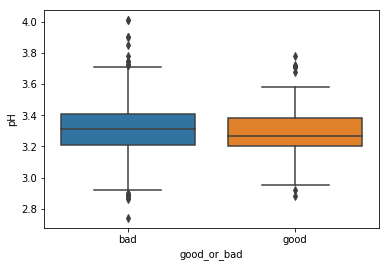

In [16]:
sns.boxplot('good_or_bad',y='pH',data=wine)

Now go ahead and run a t-test on pH for good and bad wines using the following code. 

In [17]:
from scipy.stats import ttest_ind
goodwine = wine[wine['good_or_bad'] == 'good']
badwine = wine[wine['good_or_bad'] == 'bad']
results = ttest_ind(goodwine['pH'],badwine['pH'])

### 3b.  Based on your t-test, is the difference between good and bad wines significant?

In [18]:
results.pvalue

0.02198034398691512

## Question 4 (Correlation & Regression, 20 points):

This question also uses the wine quality dataset.

In [50]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'good_or_bad'],
      dtype='object')

### 4a. Fill in the correct formula to create two regressions of pH vs. "total sulfur dioxide", one for "good" wines and one for "bad" wines (code for the regression is given to you below. 

In [51]:
formula = "INSERT YOUR CODE HERE"

In [53]:
formula = " pH ~ Q('total sulfur dioxide')"

In [54]:
model0 = smf.ols(formula, data=goodwine).fit()
model0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     pH   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.5329
Date:                Wed, 14 Nov 2018   Prob (F-statistic):              0.466
Time:                        11:20:37   Log-Likelihood:                 98.152
No. Observations:                 217   AIC:                            -192.3
Df Residuals:                     215   BIC:                            -185.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     3.2806      0.015    212.989      0.000       3.250       3.311
Q('total sulfur dioxide')     0.0002      0.000      0.730      0.466      -0.000       0.001
==============================================================================
Omnibus:                        6.927   Durbin-Watson:                   1.563
Prob(Omnibus):                  0.031   Jarque-Bera (JB):                7.539
Skew:                           0.301   Prob(JB):                       0.0231
Kurtosis:                       3.687   Cond. No.                         70.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
model0 = smf.ols(formula, data=badwine).fit()
model0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     pH   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     12.55
Date:                Wed, 14 Nov 2018   Prob (F-statistic):           0.000409
Time:                        11:20:39   Log-Likelihood:                 630.02
No. Observations:                1382   AIC:                            -1256.
Df Residuals:                    1380   BIC:                            -1246.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     3.3363      0.007    451.889      0.000       3.322       3.351
Q('total sulfur dioxide')    -0.0004      0.000     -3.543      0.000      -0.001      -0.000
==============================================================================
Omnibus:                       30.928   Durbin-Watson:                   1.558
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.067
Skew:                           0.167   Prob(JB):                     3.00e-12
Kurtosis:                       3.900   Cond. No.                         104.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 4b. How do the results of the two regressions differ?

## Question 5 (Categorical variables, 20 points):

Insert description of comic characters dataset

In [57]:
comic_characters = pd.read_csv("data/comic_characters.csv", index_col="id")
comic_characters.head(1)

,publisher,name,Identity,align,eye,hair,sex,alive,appearances,first_appearance,month,year,date
id,,,,,,,,,,,,,
1,Marvel,Spider-Man (Peter Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,Living Characters,4043.0,"1962, August",August,1962.0,8/1/1962


In [58]:
comic_characters = comic_characters[(comic_characters['Identity']== 'Secret Identity') | (comic_characters['Identity'] == 'Public Identity')]

### 5a. Create a crosstab of Identity vs. alive status

In [59]:
ct = pd.crosstab(comic_characters['Identity'], comic_characters['alive'])
ct

alive,Deceased Characters,Living Characters
Identity,,
Public Identity,1683,5309
Secret Identity,2248,6435


### 5b. Create a mosaic plot of identity vs alive status

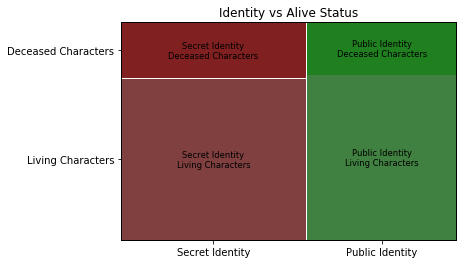

In [60]:
from statsmodels.graphics.mosaicplot import mosaic
t = mosaic(comic_characters, 
           ['Identity','alive'], 
           title='Identity vs Alive Status')

## Question 6 (Machine Learning: Clustering, 20 points):

For clustering, it's sometimes helpful to create dummy variables.  For example, the "Identity" property can be replaced by Identity_Public Identity and Indentity_Secret Identity.  The following code does that for several of the categorical variables in the comic characters dataset:

In [61]:
comic_dummies = pd.get_dummies(comic_characters,columns=['Identity','align','eye','hair','sex','alive'])


In [63]:
comic_dummies.head()

,publisher,name,appearances,first_appearance,month,year,date,Identity_Public Identity,Identity_Secret Identity,align_Bad Characters,...,hair_Violet Hair,hair_White Hair,hair_Yellow Hair,sex_Agender Characters,sex_Female Characters,sex_Genderfluid Characters,sex_Genderless Characters,sex_Male Characters,alive_Deceased Characters,alive_Living Characters
id,,,,,,,,,,,,,,,,,,,,,
1,Marvel,Spider-Man (Peter Parker),4043.0,"1962, August",August,1962.0,8/1/1962,0,1,0,...,0,0,0,0,0,0,0,1,0,1
2,Marvel,Captain America (Steven Rogers),3360.0,"1941, March",March,1941.0,3/1/1941,1,0,0,...,0,1,0,0,0,0,0,1,0,1
3,Marvel,"Wolverine (James \""Logan\"" Howlett)",3061.0,"1974, October",October,1974.0,10/1/1974,1,0,0,...,0,0,0,0,0,0,0,1,0,1
4,Marvel,"Iron Man (Anthony \""Tony\"" Stark)",2961.0,"1963, March",March,1963.0,3/1/1963,1,0,0,...,0,0,0,0,0,0,0,1,0,1
6,Marvel,Benjamin Grimm (Earth-616),2255.0,"1961, November",November,1961.0,11/1/1961,1,0,0,...,0,0,0,0,0,0,0,1,0,1


The following code creates a new DataFrame with only the resulting dummy variables:

In [64]:
comic_dummies_vars = comic_dummies.iloc[:,7:]

## Question 6: Find the optimal value of "k" for k-means clustering of the comic character dataset with dummy variables (i.e. comic_dummies_vars).

In [233]:
kmeans = KMeans(n_clusters=2) # start with 2 clusters
kmeans.fit(comic_dummies_vars)
print("Labels:")
#for l in kmeans.labels_:
    #print(l)
#
print(kmeans.labels_)

Labels:
[1 0 0 ... 0 0 0]


In [ ]:
pd.concat([pd.DataFrame(kmeans.labels_).reset_index(),comic_characters.reset_index()],axis=1).drop('index',axis=1)

In [235]:
from sklearn import metrics

In [237]:
ss = []
for k in range(2,20):
    kmeans = KMeans(n_clusters=k) # start with 2 clusters
    kmeans.fit(comic_dummies_vars)
    ss.append(metrics.silhouette_score(comic_dummies_vars,kmeans.labels_))

In [238]:
ss

[0.17758815688400834,
 0.17943707053104563,
 0.16759704296422123,
 0.1755896819132901,
 0.18735349907641974,
 0.1830130913054364,
 0.16952333708465278,
 0.18731738222109173,
 0.1796872323912094,
 0.18381689989502006,
 0.17381444411554356,
 0.19761989348075282,
 0.21743127486713823,
 0.17591872225594607,
 0.1879164352530031,
 0.20066570257454253,
 0.2020214458259754,
 0.2004079899707134]

In [249]:
from sklearn.decomposition import PCA
def plot_k_means(data,n_clusters):
    reduced_data = PCA(n_components=2).fit_transform(data)
    kmeans = KMeans(init='k-means++', n_clusters=n_clusters, n_init=10)
    kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
    Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1)
    plt.clf()
    plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

    plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
    centroids = kmeans.cluster_centers_
    plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='o', s=19, linewidths=3,
            color='w', zorder=10)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.show()

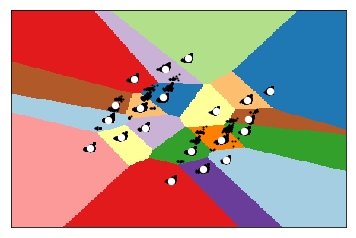

In [258]:
    plot_k_means(comic_dummies_vars,20)

## Question 7 (Natural Language Processing, 20 points):

The data/vox_transcript.csv file that we distributed as part of this test contains a transcript of the first 2016 Presidential Debate between Clinton and Trump.  

Run the following code block to load and peek at the data:

In [68]:
debate = pd.read_csv('data/vox_transcript.csv')
debate.head()

,text_id,question_id,speaker,text,text_type
0,1,1,Holt,Good evening from Hofstra University in Hempst...,q
1,2,1,Holt,The participants tonight are Donald Trump and ...,q
2,3,1,Holt,The 90-minute debate is divided into six segme...,q
3,4,1,Holt,The questions are mine and have not been share...,q
4,5,1,Holt,"I will invite you to applaud, however, at this...",q


In [74]:
from collections import Counter

In [75]:
import spacy
nlp = spacy.load('en')

In [76]:
from spacy.lang.en.stop_words import STOP_WORDS

Let's split the data so we have one DataFrame for Trump and one DataFrame for Clinton

In [77]:
trump = debate[debate['speaker'] == 'Trump']
clinton = debate[debate['speaker'] == 'Clinton']

The following code concatenates all the text from each of those dataframes into strings (one for each of Trump and Clinton):

In [78]:
trump_debate_text = trump['text'].str.cat(sep = ' ')
clinton_debate_text = clinton['text'].str.cat(sep = ' ')

In [79]:
doc = nlp(trump_debate_text)

In [82]:
labels = [x.pos_ for x in doc if x.text not in STOP_WORDS]
#Counter(labels)

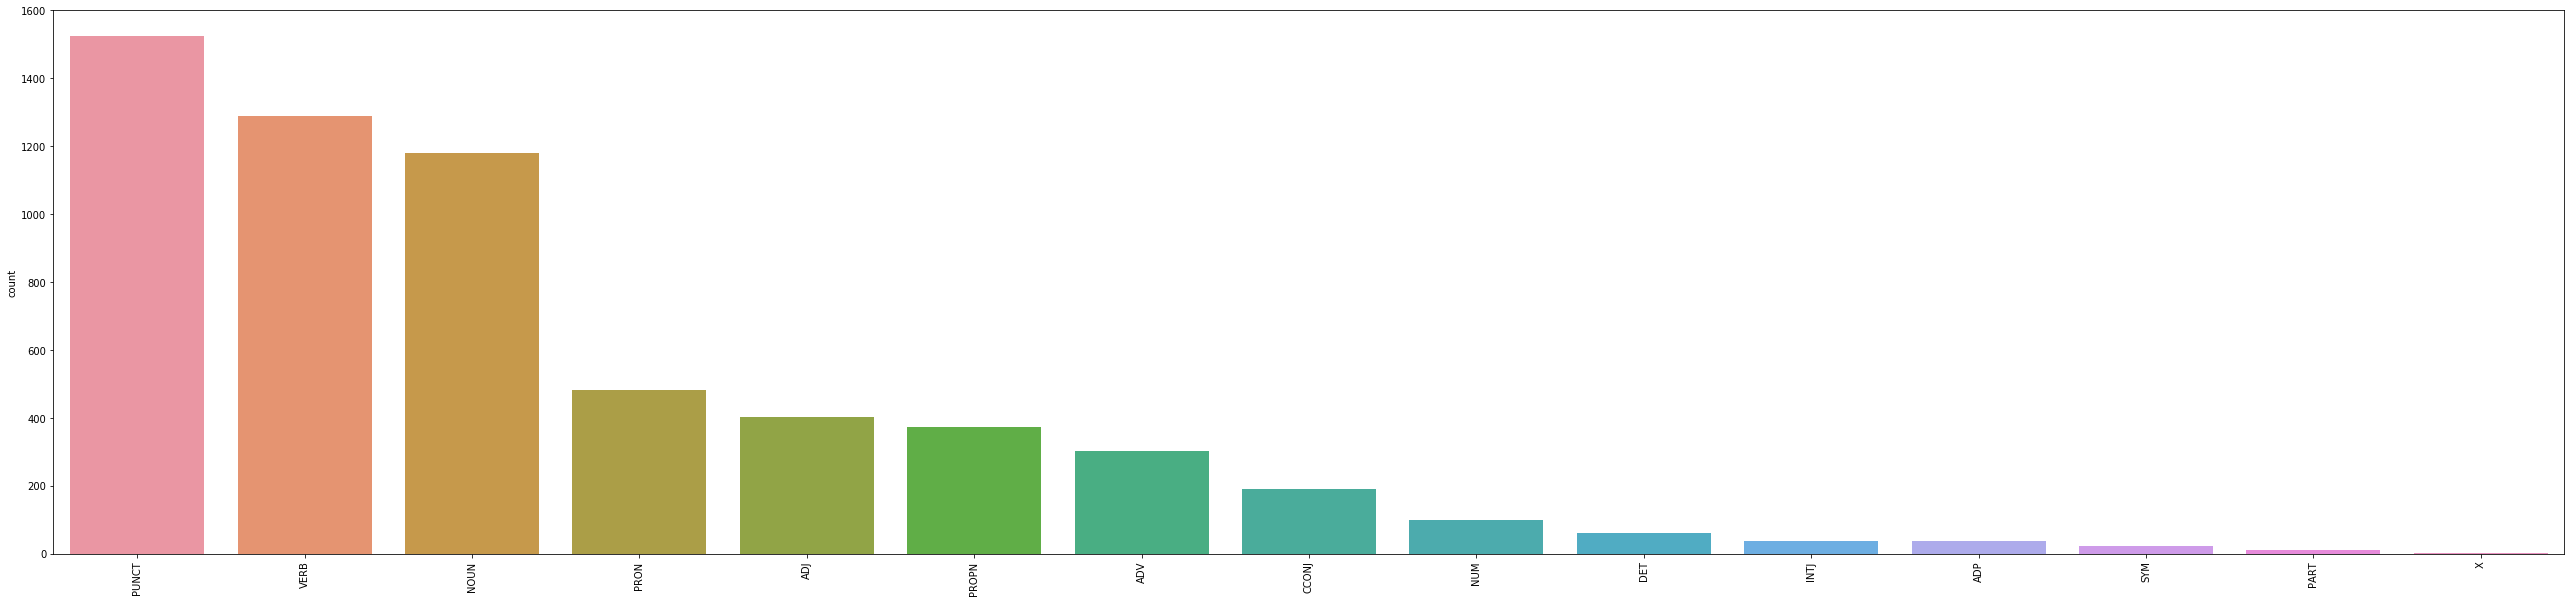

In [83]:
plt.figure(figsize=(45,10))
sns.countplot(labels, order=pd.Series(labels).value_counts().index)
# sns.countplot(words_nostop, order=[counted[0] for counted in Counter(words_nostop).most_common()])
plt.xticks(rotation=90)
plt.show()

### 7a. Repeat the above steps on the Clinton text:

In [89]:
doc = nlp(clinton_debate_text)

In [90]:
labels = [x.pos_ for x in doc if x.text not in STOP_WORDS]
#Counter(labels)

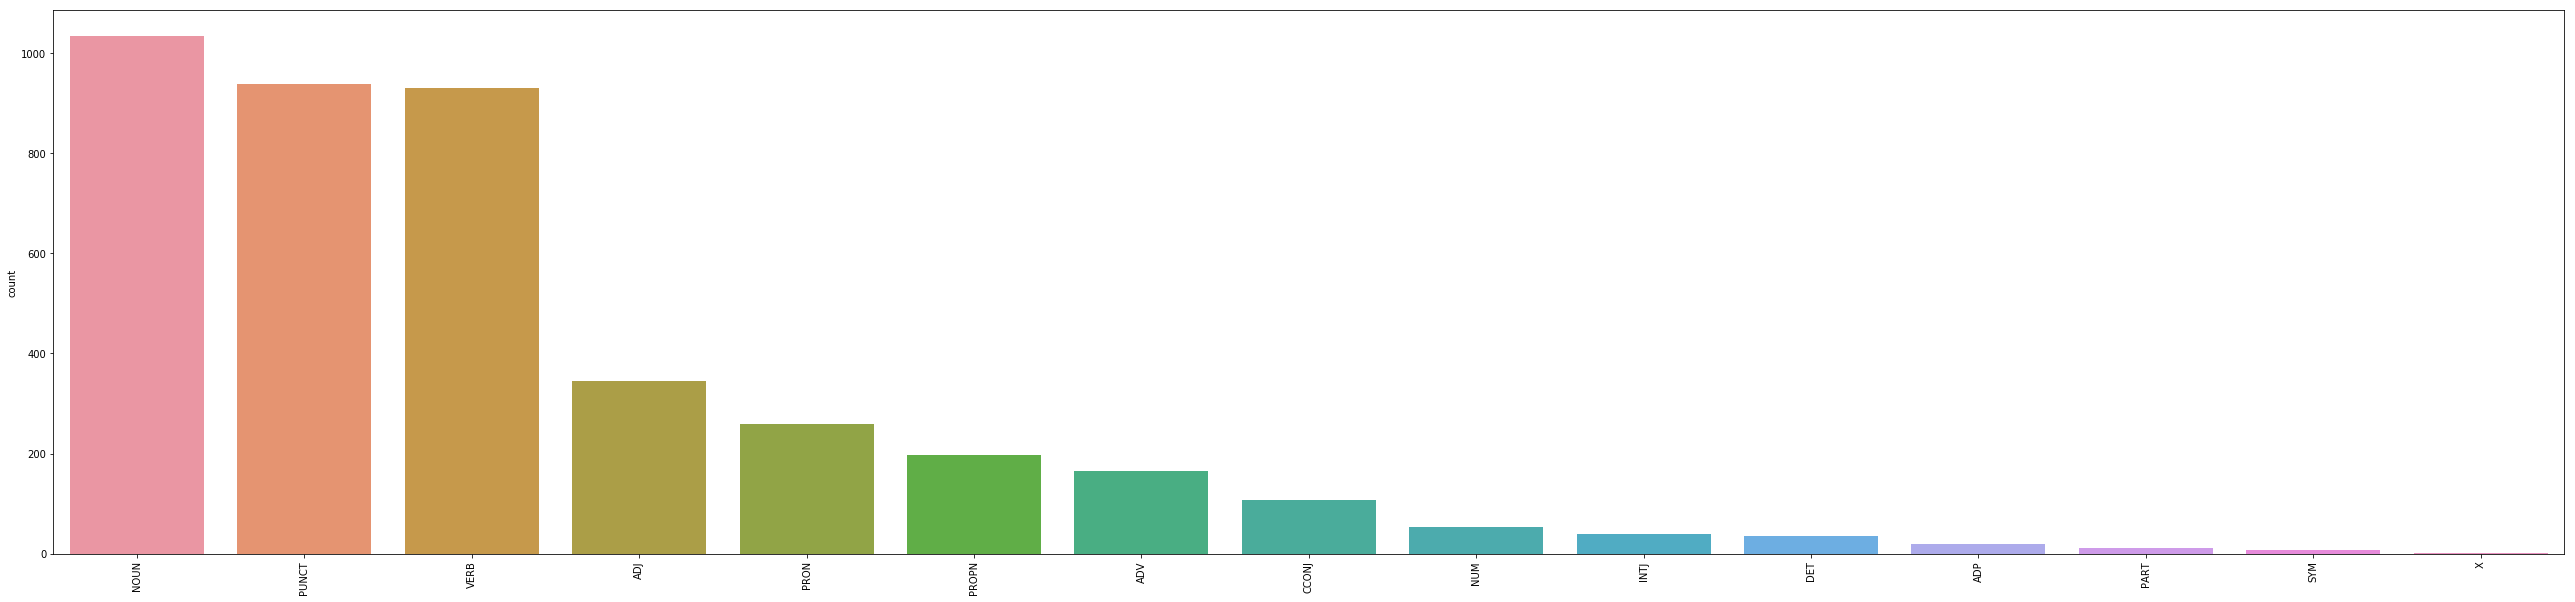

In [91]:
plt.figure(figsize=(45,10))
sns.countplot(labels, order=pd.Series(labels).value_counts().index)
# sns.countplot(words_nostop, order=[counted[0] for counted in Counter(words_nostop).most_common()])
plt.xticks(rotation=90)
plt.show()

### 7b. Describe how these distributions differ.